In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datasets
from datasets import Dataset, DatasetDict

from collections import Counter

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data
f = open("final_project/music-ner-eacl2023/data/dataset1/train.bio", "r")
train = f.read()

f = open("final_project/music-ner-eacl2023/data/dataset1/test.bio", "r")
test = f.read()

In [5]:
def df_from_text(text, counter_start=0):
    # Split the text into lines
    lines = text.strip().split('\n')

    # Initialize variables
    data = []
    unique_id = counter_start

    # Iterate over the lines
    for line in lines:
        if line.strip() == "":
            unique_id += 1  # Increment the unique ID when encountering an empty line
        else:
            word, labels = line.split()
            data.append({'tokens': word, 'ner_tags': labels, 'id': unique_id})

    return pd.DataFrame(data)

In [7]:
train_df = df_from_text(train)
train_df.tail()

,tokens,ner_tags,id
18278,similar,O,1950
18279,to,O,1950
18280,jake,B-Artist,1950
18281,chudnows,I-Artist,1950
18282,music,O,1950


In [9]:
# Concat all dfs
test_df = df_from_text(test, counter_start=1951)
music_df = pd.concat([train_df, test_df])

In [10]:
print("Shape of music_df:", music_df.shape)
print("music_df.head(10)")
music_df.head(10)

Shape of music_df: (23812, 3)
music_df.head(10)


,tokens,ner_tags,id
0,dark,O,0
1,and,O,0
2,suspenseful,O,0
3,music,O,0
4,looking,O,1
5,for,O,1
6,great,O,1
7,post,O,1
8,metal,O,1
9,bands,O,1


In [14]:
music_df.iloc[0]

tokens      dark
ner_tags       O
id             0
Name: 0, dtype: object

In [12]:
music_df.dtypes

tokens      object
ner_tags    object
id           int64
dtype: object

In [15]:
# Check for nan values
music_df.isnull().sum()

tokens      0
ner_tags    0
id          0
dtype: int64

In [56]:
# Print labels
label2id = {
    "O": 0,
    "B-Artist": 1,
    "I-Artist": 2,
    "B-WoA": 3,
    "I-WoA": 4
}

music_text_labels = list(label2id.keys())
music_num_labels= list(label2id.values())

print("music_df text labels:", music_text_labels)
print("music_df numerical labels:", music_num_labels)


music_df text labels: ['O', 'B-Artist', 'I-Artist', 'B-WoA', 'I-WoA']
music_df numerical labels: [0, 1, 2, 3, 4]


In [32]:
# Count number of instances for each label
num_of_instances = []

for i in music_text_labels: 
    num_of_i = len(music_df[music_df["ner_tags"] == i])
    num_of_instances.append(num_of_i)

# Calculate total instances
total_instances = sum(num_of_instances)

# Print out the number of instances for each label and add percentage to music_class_proportions
music_class_proportions = []

for i in range(0, len(num_of_instances)):
    print("Label:", music_text_labels[i])
    print("Num of Instances:", f"{num_of_instances[i]:,}","of", f"{total_instances:,}")
    instance_proportion = num_of_instances[i]/total_instances
    print("Percentage:", f"{(instance_proportion):.4f}","\n")
    music_class_proportions.append(instance_proportion*100)


Label: O
Num of Instances: 19,272 of 23,812
Percentage: 0.8093 

Label: B-Artist
Num of Instances: 1,270 of 23,812
Percentage: 0.0533 

Label: I-Artist
Num of Instances: 1,010 of 23,812
Percentage: 0.0424 

Label: B-WoA
Num of Instances: 928 of 23,812
Percentage: 0.0390 

Label: I-WoA
Num of Instances: 1,332 of 23,812
Percentage: 0.0559 



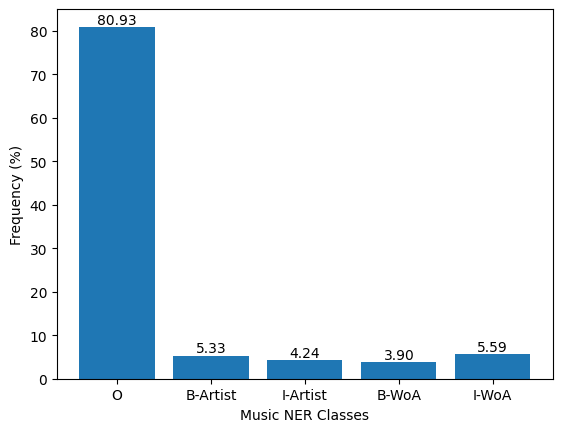

In [35]:
# Plot proportions of labels in FiNER-ORD
fig, ax = plt.subplots()
vbars = ax.bar(music_text_labels, music_class_proportions)
ax.set_xlabel('Music NER Classes')
ax.set_ylabel('Frequency (%)')
ax.bar_label(vbars, fmt='%.2f')

plt.show()

In [44]:
# Number of sentences in music_df
num_of_sentences = music_df["id"].max() + 1
print("Number of sentences in music_df:", num_of_sentences)

Number of sentences in music_df: 2551


In [46]:
# Calculate statistics for sentence lengths
len_sentences = []

for i in range(0,num_of_sentences):
    sentence_df = music_df[music_df["id"] == i]
    sentence = sentence_df["tokens"].tolist()
    len_sentence = len(sentence)
    len_sentences.append(len_sentence)

print("Max Sentence Length:", max(len_sentences))
print("Min Sentence Length:", min(len_sentences))
print("Average sentence length:", sum(len_sentences) / len(len_sentences))


Max Sentence Length: 44
Min Sentence Length: 2
Average sentence length: 9.3343786750294


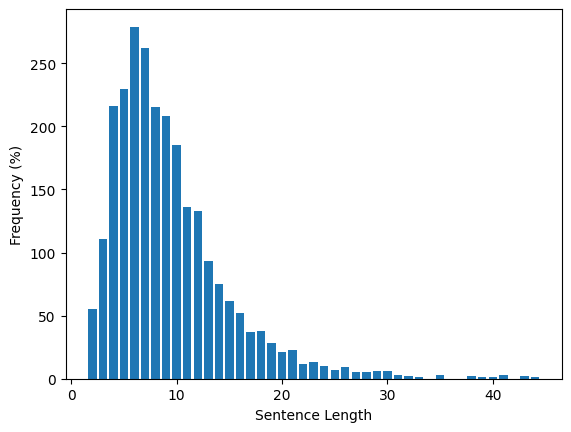

In [49]:
# Plot sentence length distribution
frequency = Counter(len_sentences)
sentence_len = list(frequency.keys())
sentence_len_counts = list(frequency.values())

plt.bar(sentence_len, sentence_len_counts)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency (%)")
plt.show()

In [55]:
# Retrieve sample sentences
def print_sample_sentence(df, id):
    select_sentence = df.loc[(df["id"] == id)]
    
    sample_sentence_tokens = select_sentence["tokens"].to_list()
    joined_sentence = " ".join(sample_sentence_tokens)
    print(joined_sentence)
    print(select_sentence["ner_tags"].to_list())

print_sample_sentence(music_df, 0)
print(" ")
print_sample_sentence(music_df, 1111)
print(" ")
print_sample_sentence(music_df, 2222)

dark and suspenseful music
['O', 'O', 'O', 'O']
 
something like deftones adrenaline
['O', 'O', 'B-Artist', 'B-WoA']
 
dreamy music | less reverb on vocals
['O', 'O', 'O', 'O', 'O', 'O', 'O']


In [223]:
# Calculate average labels in sentence


Average labels in sentence 0,0: 3


In [57]:
def get_dict_from_sent(df, uid, ner_convert=False):
    
    dict = {'id':'', 'tokens':'', 'ner_tags':[]}
    sent_df = df.loc[df['id'] == uid]
    
    dict['id'] = sent_df['id'].to_list()[0]
    dict['tokens'] = sent_df['tokens'].to_list()
    if ner_convert == True:
        dict['ner_tags'] = [label2id[i] for i in sent_df['ner_tags'].to_list()]
    else:
        dict['ner_tags'] = sent_df['ner_tags'].to_list()

    return dict

dataset = []

for i in range(0, music_df['id'].nunique()):
    dataset.append(get_dict_from_sent(music_df, i, ner_convert=True))

In [58]:
# Create huggingface dataset
ds = Dataset.from_pandas(pd.DataFrame(data=dataset))
ds

In [ ]:
# Save dataset to json
# ds.to_json('final_project/music-ner-eacl2023/music.json', orient='records', lines=True)